In [1]:
# pip install plotly==4.9.0
# pip install sodapy

In [2]:
%matplotlib inline

# Dependencies
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sodapy import Socrata
import seaborn as sns
import plotly.graph_objects as go

In [3]:
# Get the Chicago dataset via SODA API
client = Socrata("data.cityofchicago.org", None)
results = client.get("naz8-j4nc", limit=2000)
results_df = pd.DataFrame.from_records(results)
results_df.head()

,lab_report_date,cases_total,deaths_total,cases_age_0_17,cases_age_18_29,cases_age_30_39,cases_age_40_49,cases_age_50_59,cases_age_60_69,cases_age_70_79,...,deaths_unknown_age,deaths_female,deaths_male,deaths_unknown_gender,deaths_latinx,deaths_asian_non_latinx,deaths_black_non_latinx,deaths_white_non_latinx,deaths_other_non_latinx,deaths_unknown_race_eth
0,2020-07-25T00:00:00.000,24,2,4,7,5,2,2,2,1,...,0,0,2,0,2,0,0,0,0,0
1,2020-07-24T00:00:00.000,137,3,9,45,28,23,12,10,3,...,0,0,3,0,3,0,0,0,0,0
2,2020-07-23T00:00:00.000,153,0,17,43,29,23,18,10,7,...,0,0,0,0,0,0,0,0,0,0
3,2020-07-22T00:00:00.000,278,1,29,89,64,47,17,17,14,...,0,1,0,0,0,0,0,1,0,0
4,2020-07-21T00:00:00.000,231,1,22,64,46,47,22,13,8,...,0,1,0,0,1,0,0,0,0,0


In [4]:
# Save the dataset into a csv file
results_df.to_csv("covid_chicago.csv")

In [5]:
# Create a case_by_race_df by extracting corresponding columns from results_df
case_by_race_df = results_df[["lab_report_date",
                      "cases_total",
                      "cases_latinx",
                      "cases_asian_non_latinx",
                      "cases_black_non_latinx",
                      "cases_white_non_latinx",
                      "cases_other_non_latinx"]]

# Clean the data by dropping empty rows
case_by_race_df = case_by_race_df.dropna(how = "any")

# Change data type from str to int
cols = case_by_race_df.columns.drop("lab_report_date")
case_by_race_df[cols] = case_by_race_df[cols].apply(pd.to_numeric, errors='coerce')

# Remove time from date&time variable
case_by_race_df["lab_report_date"] = pd.to_datetime(case_by_race_df["lab_report_date"]).dt.date

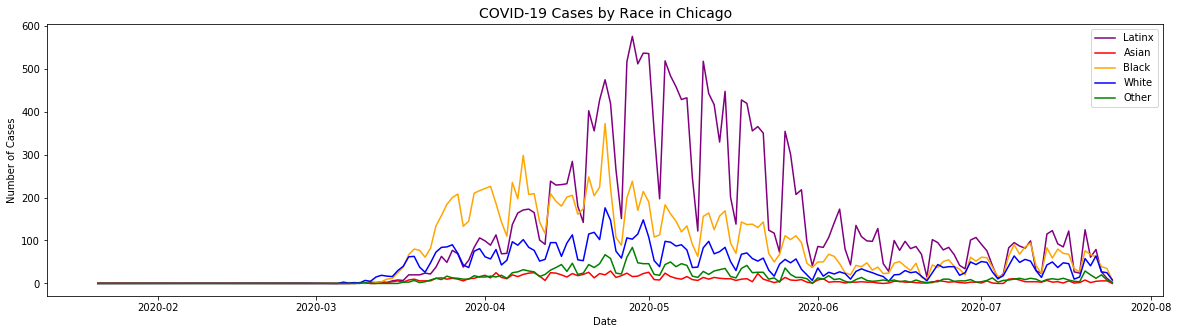

In [6]:
# Generate line graph of cases of different races over time
plt.figure(figsize=(20,5))
plt.plot(case_by_race_df["lab_report_date"], case_by_race_df["cases_latinx"], color="purple", label = "Latinx")
plt.plot(case_by_race_df["lab_report_date"], case_by_race_df["cases_asian_non_latinx"], color="red", label = "Asian")
plt.plot(case_by_race_df["lab_report_date"], case_by_race_df["cases_black_non_latinx"], color="orange", label = "Black")
plt.plot(case_by_race_df["lab_report_date"], case_by_race_df["cases_white_non_latinx"], color="blue", label = "White")
plt.plot(case_by_race_df["lab_report_date"], case_by_race_df["cases_other_non_latinx"], color="green", label = "Other")
plt.title("COVID-19 Cases by Race in Chicago", fontsize = 14)
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend(loc="upper right")
plt.savefig("Images/cases_by_race_Chicago.png")
plt.show()

In [7]:
# Calculate the percentage of each race and store the numbers in new columns
case_by_race_df["latinx_percentage"] = case_by_race_df["cases_latinx"]/case_by_race_df["cases_total"]
case_by_race_df["asian_percentage"] = case_by_race_df["cases_asian_non_latinx"]/case_by_race_df["cases_total"]
case_by_race_df["black_percentage"] = case_by_race_df["cases_black_non_latinx"]/case_by_race_df["cases_total"]
case_by_race_df["white_percentage"] = case_by_race_df["cases_white_non_latinx"]/case_by_race_df["cases_total"]
case_by_race_df["other_percentage"] = case_by_race_df["cases_other_non_latinx"]/case_by_race_df["cases_total"]
# Clean the data by dropping empty row
case_by_race_df = case_by_race_df.dropna(how = "any")
case_by_race_df.head()

,lab_report_date,cases_total,cases_latinx,cases_asian_non_latinx,cases_black_non_latinx,cases_white_non_latinx,cases_other_non_latinx,latinx_percentage,asian_percentage,black_percentage,white_percentage,other_percentage
0,2020-07-25,24,2,0,8,8,3,0.083333,0.000000,0.333333,0.333333,0.125000
1,2020-07-24,137,12,6,35,25,8,0.087591,0.043796,0.255474,0.182482,0.058394
2,2020-07-23,153,27,6,39,27,20,0.176471,0.039216,0.254902,0.176471,0.130719
3,2020-07-22,278,79,5,62,64,12,0.284173,0.017986,0.223022,0.230216,0.043165
4,2020-07-21,231,61,2,67,41,20,0.264069,0.008658,0.290043,0.177489,0.086580


In [8]:
# Consider when the total cases started to increase (later than 2020-03-18)
df = case_by_race_df.iloc[0:130,:]
df

,lab_report_date,cases_total,cases_latinx,cases_asian_non_latinx,cases_black_non_latinx,cases_white_non_latinx,cases_other_non_latinx,latinx_percentage,asian_percentage,black_percentage,white_percentage,other_percentage
0,2020-07-25,24,2,0,8,8,3,0.083333,0.000000,0.333333,0.333333,0.125000
1,2020-07-24,137,12,6,35,25,8,0.087591,0.043796,0.255474,0.182482,0.058394
2,2020-07-23,153,27,6,39,27,20,0.176471,0.039216,0.254902,0.176471,0.130719
3,2020-07-22,278,79,5,62,64,12,0.284173,0.017986,0.223022,0.230216,0.043165
4,2020-07-21,231,61,2,67,41,20,0.264069,0.008658,0.290043,0.177489,0.086580
...,...,...,...,...,...,...,...,...,...,...,...,...
125,2020-03-22,169,22,6,82,48,8,0.130178,0.035503,0.485207,0.284024,0.047337
126,2020-03-21,125,24,6,61,26,4,0.192000,0.048000,0.488000,0.208000,0.032000
127,2020-03-20,155,20,6,77,38,2,0.129032,0.038710,0.496774,0.245161,0.012903
128,2020-03-19,186,20,10,80,63,7,0.107527,0.053763,0.430108,0.338710,0.037634


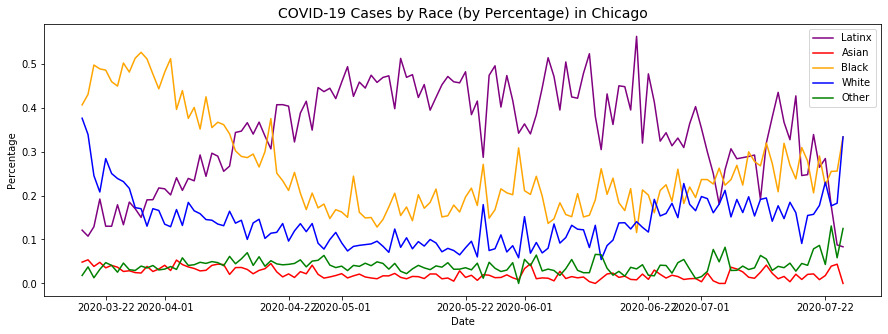

In [9]:
# Generate line graph of cases (by percentage) of different races over time
plt.figure(figsize=(15,5))
plt.plot(df["lab_report_date"], df["latinx_percentage"], color="purple", label = "Latinx")
plt.plot(df["lab_report_date"], df["asian_percentage"], color="red", label = "Asian")
plt.plot(df["lab_report_date"], df["black_percentage"], color="orange", label = "Black")
plt.plot(df["lab_report_date"], df["white_percentage"], color="blue", label = "White")
plt.plot(df["lab_report_date"], df["other_percentage"], color="green", label = "Other")
plt.title("COVID-19 Cases by Race (by Percentage) in Chicago", fontsize = 14)
plt.xlabel("Date")
plt.ylabel("Percentage")
plt.legend(loc="upper right")
plt.savefig("Images/cases_by_race_percentage_Chicago.png")
plt.show()

In [13]:
# Calculate the cumulative cases of each race
cul_latinx = case_by_race_df["cases_latinx"].sum()
cul_asian = case_by_race_df["cases_asian_non_latinx"].sum()
cul_black = case_by_race_df["cases_black_non_latinx"].sum()
cul_white = case_by_race_df["cases_white_non_latinx"].sum()
cul_other = case_by_race_df["cases_other_non_latinx"].sum()

# Create a bar graph to show the cumulative cases of each race
df = pd.DataFrame({"race":["Latinx", "Asian", "Black", "White", "Other"],
                   "cases":[cul_latinx, cul_asian, cul_black, cul_white, cul_other]})

df = df.sort_values("cases", ascending = True)
fig = go.Figure(go.Bar(
            x= df["cases"],
            y= df["race"],
            orientation='h',
            marker=dict(
               color=['red','green','blue','orange','purple']),
            text = df["cases"], textposition = "auto"))
fig.update_layout(
    title="COVID-19 Cases by Race in Chicago", xaxis={'visible': False}
)
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
fig.write_image("Images/cases_by_race_Chicago_bar.png")
fig.show()

In [14]:
# Create a death_by_race_df by extracting corresponding columns from results_df
death_by_race_df = results_df[["lab_report_date",
                      "deaths_total",
                      "deaths_latinx",
                      "deaths_asian_non_latinx",
                      "deaths_black_non_latinx",
                      "deaths_white_non_latinx",
                      "deaths_other_non_latinx",
                     "deaths_unknown_race_eth"]]

In [15]:
# Clean the data by dropping empty row
death_by_race_df = death_by_race_df.dropna(how = "any")

# Change data type from str to int
cols = death_by_race_df.columns.drop("lab_report_date")
death_by_race_df[cols] = death_by_race_df[cols].apply(pd.to_numeric, errors='coerce')

# Remove time from date&time variable
death_by_race_df["lab_report_date"] = pd.to_datetime(death_by_race_df["lab_report_date"]).dt.date

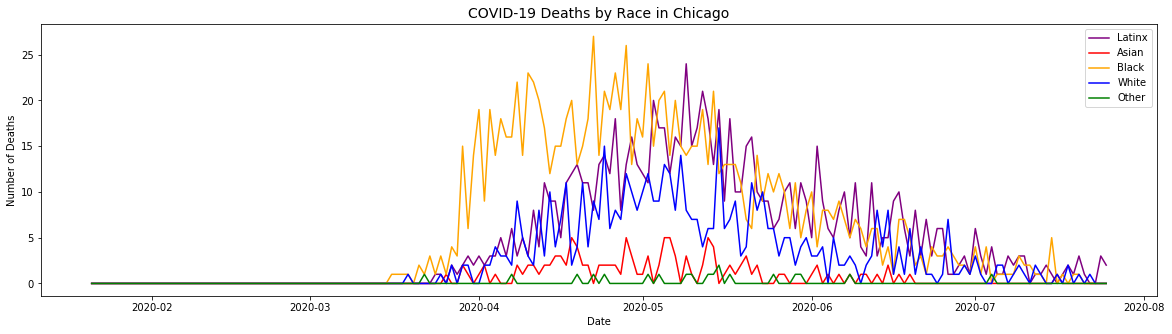

In [16]:
# Generate line graph of deaths of different races over time
plt.figure(figsize=(20,5))
plt.plot(death_by_race_df["lab_report_date"], death_by_race_df["deaths_latinx"], color="purple", label = "Latinx")
plt.plot(death_by_race_df["lab_report_date"], death_by_race_df["deaths_asian_non_latinx"], color="red", label = "Asian")
plt.plot(death_by_race_df["lab_report_date"], death_by_race_df["deaths_black_non_latinx"], color="orange", label = "Black")
plt.plot(death_by_race_df["lab_report_date"], death_by_race_df["deaths_white_non_latinx"], color="blue", label = "White")
plt.plot(death_by_race_df["lab_report_date"], death_by_race_df["deaths_other_non_latinx"], color="green", label = "Other")
plt.title("COVID-19 Deaths by Race in Chicago", fontsize = 14)
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.legend(loc="upper right")
plt.savefig("Images/deaths_by_race_Chicago.png")
plt.show()

In [17]:
# Calculate the percentage of each race and store the numbers in new columns
death_by_race_df["latinx_percentage"] = death_by_race_df["deaths_latinx"]/death_by_race_df["deaths_total"]
death_by_race_df["asian_percentage"] = death_by_race_df["deaths_asian_non_latinx"]/death_by_race_df["deaths_total"]
death_by_race_df["black_percentage"] = death_by_race_df["deaths_black_non_latinx"]/death_by_race_df["deaths_total"]
death_by_race_df["white_percentage"] = death_by_race_df["deaths_white_non_latinx"]/death_by_race_df["deaths_total"]
death_by_race_df["other_percentage"] = death_by_race_df["deaths_other_non_latinx"]/death_by_race_df["deaths_total"]

# Clean the data by dropping empty row
death_by_race_df = death_by_race_df.dropna(how = "any")
death_by_race_df.head()

,lab_report_date,deaths_total,deaths_latinx,deaths_asian_non_latinx,deaths_black_non_latinx,deaths_white_non_latinx,deaths_other_non_latinx,deaths_unknown_race_eth,latinx_percentage,asian_percentage,black_percentage,white_percentage,other_percentage
0,2020-07-25,2,2,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
1,2020-07-24,3,3,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
3,2020-07-22,1,0,0,0,1,0,0,0.0,0.0,0.0,1.0,0.0
4,2020-07-21,1,1,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
5,2020-07-20,5,3,0,1,1,0,0,0.6,0.0,0.2,0.2,0.0


In [23]:
# Consider when the total deaths more than 1 (later than 2020-03-16)
df = death_by_race_df.iloc[0:130,:]
df

,lab_report_date,deaths_total,deaths_latinx,deaths_asian_non_latinx,deaths_black_non_latinx,deaths_white_non_latinx,deaths_other_non_latinx,deaths_unknown_race_eth,latinx_percentage,asian_percentage,black_percentage,white_percentage,other_percentage
0,2020-07-25,2,2,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
1,2020-07-24,3,3,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
3,2020-07-22,1,0,0,0,1,0,0,0.0,0.0,0.0,1.0,0.0
4,2020-07-21,1,1,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
5,2020-07-20,5,3,0,1,1,0,0,0.6,0.0,0.2,0.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,2020-03-21,2,0,0,2,0,0,0,0.0,0.0,1.0,0.0,0.0
128,2020-03-19,2,0,0,1,1,0,0,0.0,0.0,0.5,0.5,0.0
129,2020-03-18,1,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0
130,2020-03-17,1,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0


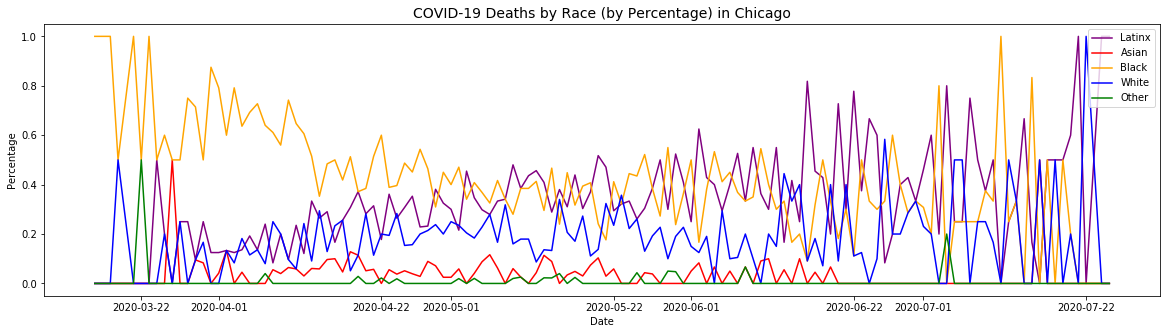

In [24]:
# Generate line graph of deaths (by percentage) of different races over time
plt.figure(figsize=(20,5))
plt.plot(df["lab_report_date"], df["latinx_percentage"], color="purple", label = "Latinx")
plt.plot(df["lab_report_date"], df["asian_percentage"], color="red", label = "Asian")
plt.plot(df["lab_report_date"], df["black_percentage"], color="orange", label = "Black")
plt.plot(df["lab_report_date"], df["white_percentage"], color="blue", label = "White")
plt.plot(df["lab_report_date"], df["other_percentage"], color="green", label = "Other")
plt.title("COVID-19 Deaths by Race (by Percentage) in Chicago", fontsize = 14)
plt.xlabel("Date")
plt.ylabel("Percentage")
plt.legend(loc="upper right")
plt.savefig("Images/deaths_by_race_percentage_Chicago.png")
plt.show()

In [25]:
# Calculate the cumulative deaths of each race
cul_latinx = death_by_race_df["deaths_latinx"].sum()
cul_asian = death_by_race_df["deaths_asian_non_latinx"].sum()
cul_black = death_by_race_df["deaths_black_non_latinx"].sum()
cul_white = death_by_race_df["deaths_white_non_latinx"].sum()
cul_other = death_by_race_df["deaths_other_non_latinx"].sum()

In [26]:
# Create a bar graph to show the cumulative deaths of each race
df = pd.DataFrame({"race":["Latinx", "Asian", "Black", "White", "Other"],
                             "deaths":[cul_latinx, cul_asian, cul_black, cul_white, cul_other]})

df = df.sort_values("deaths", ascending = True)
fig = go.Figure(go.Bar(
            x= df["deaths"],
            y= df["race"],
            orientation='h',
            marker=dict(
               color=['green','red','blue','purple','orange']),
            text = df["deaths"], textposition = "auto"))
fig.update_layout(
    title="COVID-19 Deaths by Race in Chicago",xaxis={'visible': False}
)
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
fig.write_image("Images/deaths_by_race_Chicago_bar.png")
fig.show()